<a href="https://colab.research.google.com/github/davidrtorres/Deep_Learning/blob/main/images_malaria_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Malaria Cell Detection using Convolutional Neural Networks.
This is an image classification problem using convolutional neural networks (CNN) to detect whether images of malarial cells are parasitized or healthy.<br>
The dataset consists of 2 folders of Parasitized and Uninfected images.  The Parasitized folder contains 13,799 images.  The Unifected folder also contains 13,799 images.<br>
The notebook shows how I used Keras and os to get the data.


In [1]:
import pandas as pd
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import models, layers
import cv2
import os
from PIL import Image #to resize images b/c they're all different sizes. resize from pillow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Get the Data Using Keras

In [3]:
data_dir = "/content/drive/MyDrive/datasets/cell_images/"  

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, #this is the data directory
    seed=123,
    shuffle=True,#it will randomly shuffle images and load them 
    image_size=(IMAGE_SIZE,IMAGE_SIZE),#all images are 256 x 256
    batch_size=BATCH_SIZE #32 is standard batch size
)

Found 27558 files belonging to 2 classes.


In [5]:
class_names = dataset.class_names
class_names

['Parasitized', 'Uninfected']

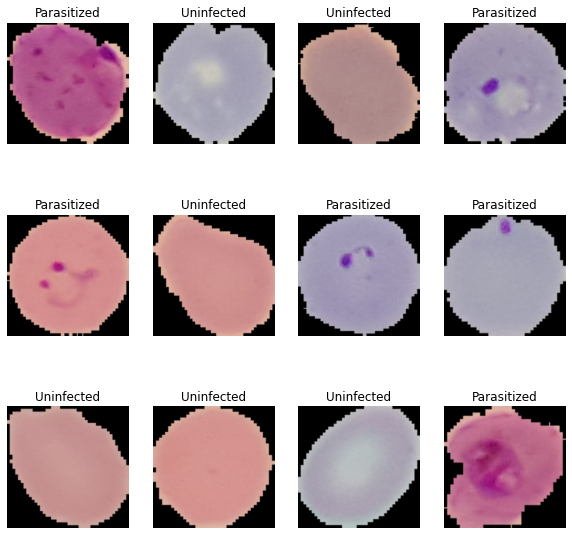

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): #display 12 of the batch of 32
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('Off')

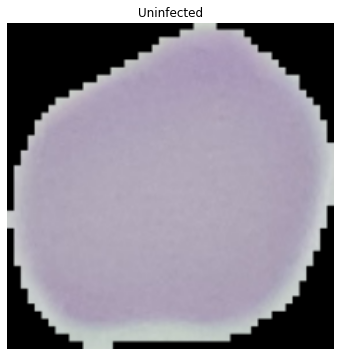

In [7]:
plt.figure(figsize=(6,6))
for image_batch, label_batch in dataset.take(1):
    for i in range(12): #display 12 of the batch of 32
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        #print(image_batch[0].shape)
        plt.axis('Off')

### Split the Dataset

In [8]:
batch_size=16
img_height=150
img_width = 150

train_ds=tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
#rescale = 1./255,
seed=123,
#image_size=(img_height, img_width),
batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
#rescale = 1./255,
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size 
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [9]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255)
])

### Define Network

In [10]:
input_shape= (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes= 1

model = models.Sequential([
    resize_and_rescale,
    #data_augmentation,
    #1st cnn and pooling layer
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    #2nd cnn, pooling layer
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #3rd cnn, pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #4th cnn, pooling layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #5th cnn, pooling layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #Flatten layer
    layers.Flatten(),
    #Dense layer
    layers.Dense(64, activation='relu'),
    #output layer
    layers.Dense(n_classes, activation='sigmoid'),
])
#define the model. Create an instance of the model
model.compile(loss='binary_crossentropy',#categorical_crossentropy
              optimizer='adam',            #also try rmsprop'
              metrics=['accuracy'])

model.build(input_shape=input_shape)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [12]:
EPOCHS = 20

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    #verbose=1,
    epochs= EPOCHS
)

Epoch 1/20
1378/1378 [==============================] - 29s 18ms/step - loss: 0.2218 - accuracy: 0.9144 - val_loss: 0.1571 - val_accuracy: 0.9499
Epoch 2/20
1378/1378 [==============================] - 24s 17ms/step - loss: 0.1465 - accuracy: 0.9547 - val_loss: 0.1412 - val_accuracy: 0.9552
Epoch 3/20
1378/1378 [==============================] - 24s 18ms/step - loss: 0.1379 - accuracy: 0.9561 - val_loss: 0.1377 - val_accuracy: 0.9541
Epoch 4/20
1378/1378 [==============================] - 24s 18ms/step - loss: 0.1274 - accuracy: 0.9588 - val_loss: 0.1265 - val_accuracy: 0.9555
Epoch 5/20
1378/1378 [==============================] - 24s 18ms/step - loss: 0.1183 - accuracy: 0.9605 - val_loss: 0.1315 - val_accuracy: 0.9546
Epoch 6/20
1378/1378 [==============================] - 24s 18ms/step - loss: 0.1105 - accuracy: 0.9622 - val_loss: 0.1297 - val_accuracy: 0.9539
Epoch 7/20
1378/1378 [==============================] - 24s 18ms/step - loss: 0.1044 - accuracy: 0.9629 - val_loss: 0.1437 -

## Using OS to get Data

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import models, layers
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K
from tensorflow.keras.models import Model, load_model

In [14]:
image_directory = '/content/drive/MyDrive/datasets/cell_images/'
SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.


parasitized_images = os.listdir(image_directory + 'Parasitized/') #in a subdirectory called 'Parasitized/'
#need to iterate through every file in subdirectory
for i, image_name in enumerate(parasitized_images):    #Remember enumerate method adds a counter and returns the enumerate object
    #go through this folder and see if it's a png image
    if (image_name.split('.')[1] == 'png'):#is this a png image, if yes,then read the image
        image = cv2.imread(image_directory + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')#convert to PIL format
        image = image.resize((SIZE, SIZE))#resize image
        dataset.append(np.array(image))#convert back to numpy array and add to dataset
        label.append(1)
        
uninfected_images = os.listdir(image_directory + 'Uninfected/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
dataset = np.array(dataset)
label = np.array(label)
print("Dataset size is ", dataset.shape)
print("Label size is ", label.shape)


Dataset size is  (27558, 64, 64, 3)
Label size is  (27558,)


In [15]:
len(dataset), len(label)

(27558, 27558)

### Split the Dataset

In [16]:
#to_categorical(np.array(label))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)
print("Train size is ", X_train.shape)
print("Test size is ", X_test.shape)

#from keras.utils import normalize
X_train = X_train / 255
X_test = X_test / 255

Train size is  (22046, 64, 64, 3)
Test size is  (5512, 64, 64, 3)


In [17]:
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [18]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3). Images input into network


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#puts a 2 x 2 matrix on top of previous image. In matrix pulling maximum #.
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.2))#droput 20% of data radomnly, way of regularizing algorithm to avoid overfittin or minimize it.

model.add(Conv2D(32, (3, 3))) #, kernel_initializer = 'he_uniform'
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(64, (3, 3))) #, kernel_initializer = 'he_uniform'
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(rate=0.2))

#flatten layer
model.add(Flatten())
#hidden layer
model.add(Dense(256, activation='relu'))
#model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))
#output layer
model.add(Dense(1, activation='sigmoid'))


#loss function we're trying to minimize after every epoch
model.compile(loss='binary_crossentropy',#categorical_crossentropy
              optimizer='adam',            #also try rmsprop'
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 32)       

In [19]:
#np.array(X_train)
history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, #takes 64 images at a time
                         verbose = 1, 
                         epochs = 20, #1 epoch it goes through the network once     
                         validation_split= 0.1,#holds 10% of data for validation to monitor validation accuracy
                         shuffle = False
                     )

Epoch 1/20
311/311 [==============================] - 3s 8ms/step - loss: 0.5517 - accuracy: 0.7508 - val_loss: 3.7851 - val_accuracy: 0.5052
Epoch 2/20
311/311 [==============================] - 2s 7ms/step - loss: 0.2089 - accuracy: 0.9216 - val_loss: 0.4978 - val_accuracy: 0.8476
Epoch 3/20
311/311 [==============================] - 2s 7ms/step - loss: 0.1674 - accuracy: 0.9394 - val_loss: 0.2061 - val_accuracy: 0.9329
Epoch 4/20
311/311 [==============================] - 2s 7ms/step - loss: 0.1557 - accuracy: 0.9450 - val_loss: 0.2308 - val_accuracy: 0.9061
Epoch 5/20
311/311 [==============================] - 2s 7ms/step - loss: 0.1457 - accuracy: 0.9477 - val_loss: 0.1820 - val_accuracy: 0.9361
Epoch 6/20
311/311 [==============================] - 2s 7ms/step - loss: 0.1355 - accuracy: 0.9528 - val_loss: 0.1877 - val_accuracy: 0.9324
Epoch 7/20
311/311 [==============================] - 2s 7ms/step - loss: 0.1309 - accuracy: 0.9547 - val_loss: 0.1870 - val_accuracy: 0.9379
Epoch 

In [20]:
#print("Test accuracy: {}%".format(model.evaluate(X_test, y_test)))
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


173/173 [==============================] - 1s 3ms/step - loss: 0.1375 - accuracy: 0.9557
Accuracy =  95.57329416275024 %


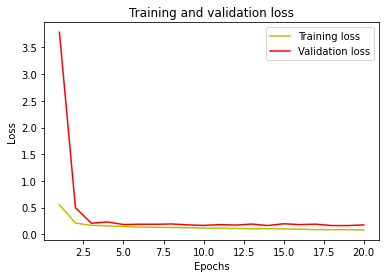

In [21]:
#is validation loss converging with train?
#overfitting is when model is great on train set but not on test set
#if converging it tells us that the model generalized well on unseen data. Means it's ready to be deployed
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

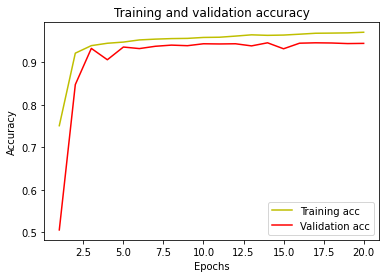

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Save Model

In [23]:
model.save("/content/drive/MyDrive/datasets/malaria_cnn.h5")

### Prediction

In [24]:
preds = model.predict(X_test)

In [25]:
preds = preds.argmax(axis=1)

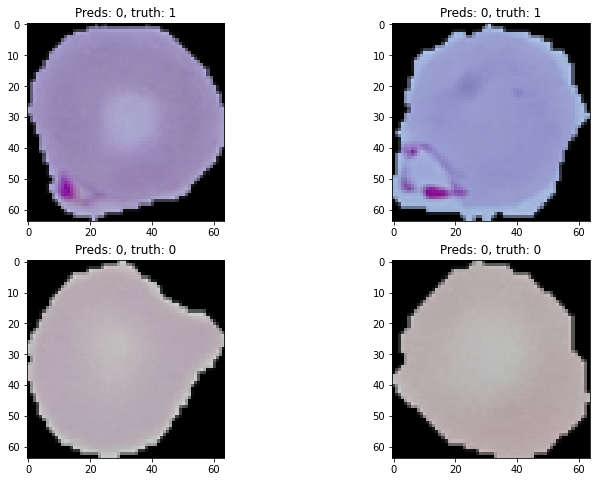

<Figure size 864x1656 with 0 Axes>

In [26]:
#y_test = y_test.argmax(axis=1)
fig, axs = plt.subplots(2, 2,figsize=(12, 8))

axs[0, 0].imshow(X_test[0])
axs[0,0].set_title(f'Preds: {preds[0]}, truth: {y_test[0]}')
axs[0, 1].imshow(X_test[1])
axs[0,1].set_title(f'Preds: {preds[1]}, truth: {y_test[1]}')
axs[1, 0].imshow(X_test[2])
axs[1,0].set_title(f'Preds: {preds[2]}, truth: {y_test[2]}')
axs[1, 1].imshow(X_test[3])
axs[1,1].set_title(f'Preds: {preds[3]}, truth: {y_test[3]}')
plt.figure(figsize=(12,23))
plt.show()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
score = accuracy_score(y_test,preds)
score

0.5096153846153846

In [29]:
mythreshold=0.885
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[2785   24]
 [ 313 2390]]


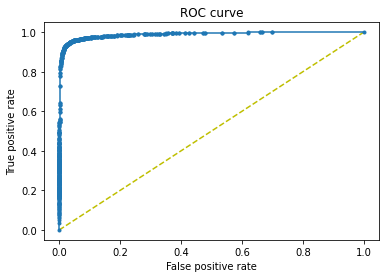

In [30]:
#ROC Plot
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [31]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)


Ideal threshold is:  444    0.182329
Name: thresholds, dtype: float32
Area under curve, AUC =  0.9892610388862921
